In [14]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pylab as pl
#plt.rc("font", size=14)
import seaborn as sns
from scipy.interpolate import spline,interpolate   
sns.set(style="whitegrid")
#sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
from math import factorial
def savitzky_golay(y, window_size, order, deriv=0, rate=1):    
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError, msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

/Library/Python/2.7/site-packages/ipykernel_launcher.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Library/Python/2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Python/2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Library/Python/2.7/site-packages/ipykernel/kernelapp.py", line

In [15]:
data_path = '../data/'
zero_count_file = data_path + 'zero_count.csv'
raw_data_file = data_path + 'data_gzip.csv'
zero_filter_file = data_path + 'data_zero_filter_01_30.csv'
label_file = data_path + 'info.csv'

series_file = data_path + 'fetal_series_01_30.npy'
series_smooth_file = data_path + 'fetal_series_smooth.npy'
image_file = data_path + 'fetal_image_01_30_bold.npy'

NameError: name 'data1' is not defined

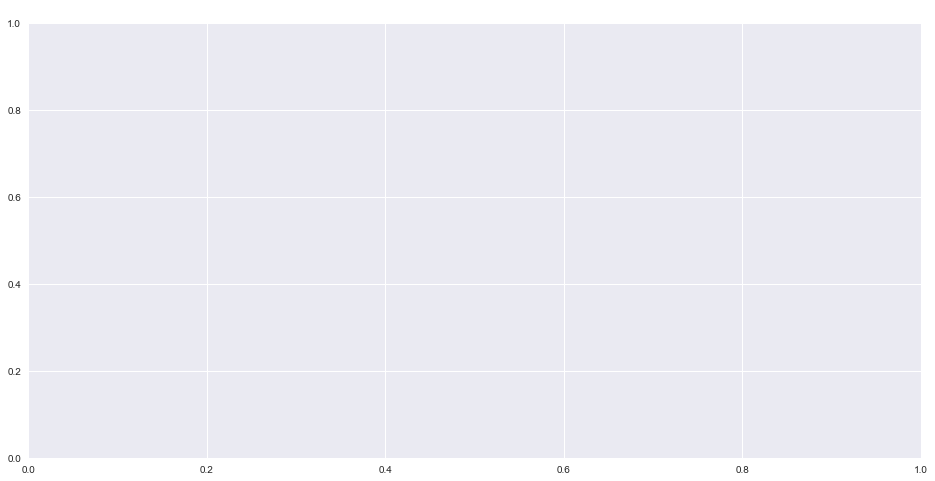

In [30]:
sns.set(rc={"figure.figsize": (16, 8)});
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax = sns.distplot(data1,bins=40,hist=True,kde=False,vertical=True,stick)

ax.set_xlabel('sample number',)
ax.set_ylabel('missing value number')
plt.savefig(datapath + 'zero_count_rate.png', bbox_inches='tight')

In [18]:
sample = pd.read_csv(zero_filter_file)

In [19]:
sample.shape

(20123, 2403)

In [20]:
del sample['id']

In [22]:
sample = pd.read_csv(raw_data_file)
del sample['id']
sample.loc[29].to_csv(data_path+'/figure_excel/figure7.csv')

In [34]:
sample.loc[9].to_csv(data_path+'/figure_excel/figure8.csv')

In [36]:
sample.loc[19].to_csv(data_path+'/figure_excel/figure9.csv')

In [37]:
sample.loc[382].to_csv(data_path+'/figure_excel/figure11_1.csv')

In [25]:
## figure7
sample_figure = sample.loc[29]
sns.set(rc={"figure.figsize": (60, 10), "lines.linewidth": 3},style='white', font_scale = 4);
ax.set_xlabel("time", fontsize = 3)
ax.set_ylabel("heart_rate", fontsize = 3)
ax = sns.tsplot(data=sample_figure, color="black")
# ax.set_yticklabels(ax.get_yticklabels(), rotation=90)
plt.savefig(data_path + '/figures/figure7_2.png',bbox_inches='tight',edgecolor='white')

NameError: name 'ax' is not defined

/Library/Python/2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


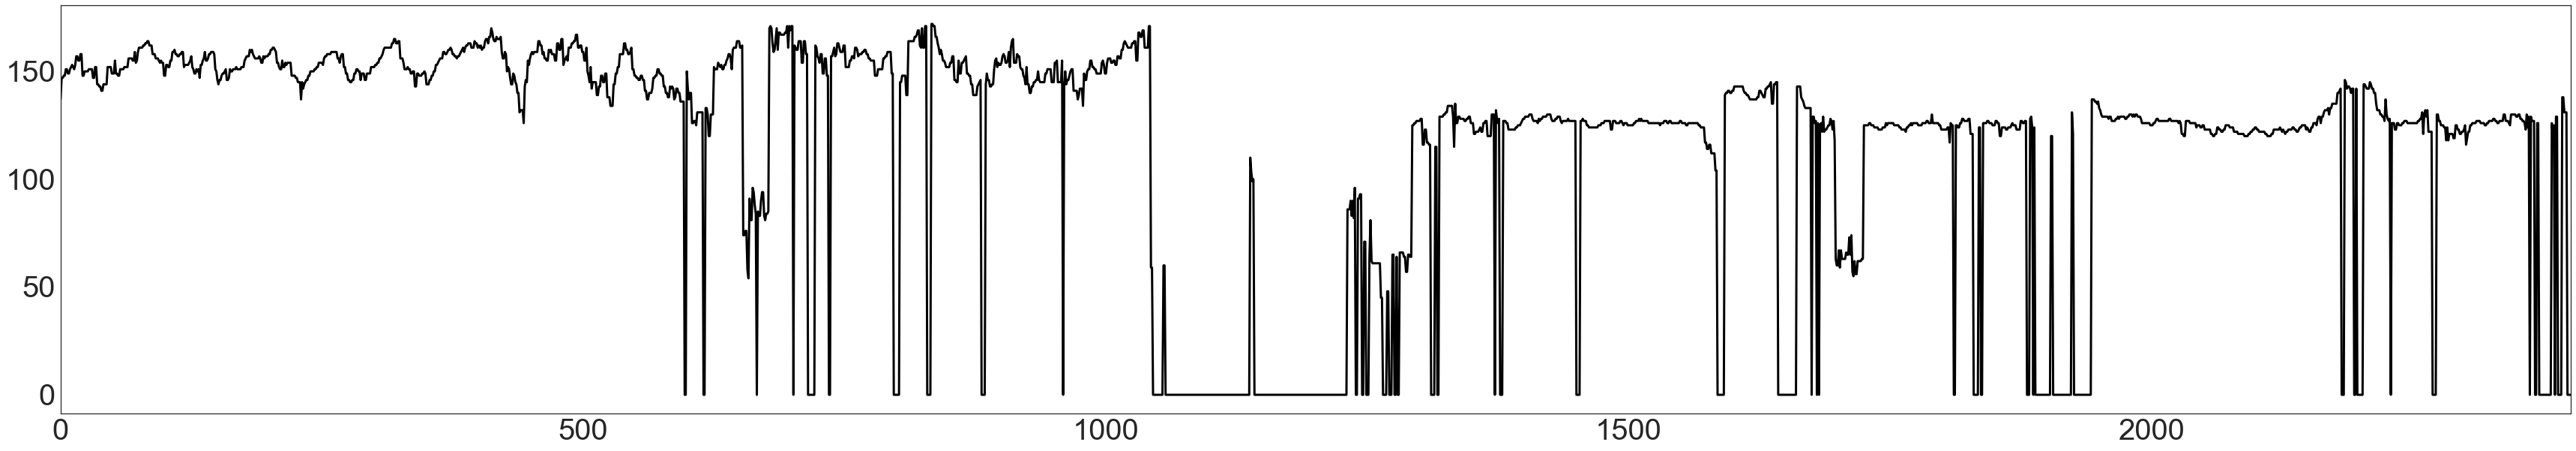

In [50]:
## figure8
sample_figure = sample.loc[19] # 19
sns.set(rc={"figure.figsize": (60, 10), "lines.linewidth": 3},style='white', font_scale = 4);
ax.set_xlabel("time", fontsize = 3)
ax.set_ylabel("heart_rate", fontsize = 3)
ax = sns.tsplot(data=sample_figure, color="black")
# ax.set_yticklabels(ax.get_yticklabels(), rotation=90)
plt.savefig(data_path + '/figures/figure9.png',bbox_inches='tight',edgecolor='white')

In [145]:
## figure11_1
sns.set(rc={"figure.figsize": (60, 10), "lines.linewidth": 3},style='white', font_scale = 4);
sample_figure = sample.loc[382] #  382
ax = sns.tsplot(data=sample_figure, color="black")
plt.savefig(data_path + '/figures/' + 'figure11_1.png',bbox_inches='tight',edgecolor='white')
plt.close('all')

/Library/Python/2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


In [38]:
sample2 = pd.read_csv(data_path + 'data_zero_filter_figure11.csv')
del sample2['id']

In [42]:
sample2.loc[382].to_csv(data_path+'/figure_excel/figure11_2.csv')

In [43]:
sample2.loc[373].to_csv(data_path+'/figure_excel/figure12_1.csv')

In [ ]:
sample2.loc[373].to_csv(data_path+'/figure_excel/figure12_1.csv')

In [155]:
## figure11_2
sample_custom[0] = 0
sample_figure = sample_custom
ax = sns.tsplot(data=sample_figure, color="black")
plt.savefig(data_path + '/figures/' + 'figure11_2.png',bbox_inches='tight',edgecolor='white')
plt.close('all')

/Library/Python/2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


In [ ]:
#figure12_1
sns.set(rc={"figure.figsize": (60, 10), "lines.linewidth": 3},style='white', font_scale = 4);
sample_figure = sample2.loc[373]
ax = sns.tsplot(data= sample_figure, color="black")
plt.savefig(data_path + '/figures/' + 'figure12_1.png',bbox_inches='tight',edgecolor='white')
plt.close('all')

In [46]:
#figure12_2
sample_figure = sample2.loc[373]
x = np.linspace(0,2402,2402)
y = np.array(sample_figure)
print(y)
#y = y0.reshape(1, 2402)
yhat = savitzky_golay(y,window_size=31,order=4)
pd.DataFrame(yhat).to_csv(data_path+'/figure_excel/figure12_2.csv')
#sns.tsplot(data = yhat,color="black")
#plt.savefig(data_path + '/figures/' + 'figure12_2.png',bbox_inches='tight',edgecolor='white')
#plt.close('all')

[141 141 141 ... 147 147 147]
